In [99]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [119]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [120]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [121]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\imdb_tvshows.csv")

In [122]:
df.shape

(8319, 5)

In [123]:
df.head()

,Unnamed: 0,Rating (out of 10),Review,Show ID,Review ID
0,0,9,Andor was every bit as good as I was hoping fo...,tt9253284,rw10514299
1,1,10,Wow. I just finished episode 12 of the first s...,tt9253284,rw8690571
2,2,10,Andor Season 2 is the best Star Wars Show ever...,tt9253284,rw10514285
3,3,9,There were a few episodes I didn't like in bot...,tt9253284,rw10514788
4,4,9,Didnt like the new movies and even Mandalorian...,tt9253284,rw8665236


In [124]:
df.isnull().sum()

Unnamed: 0            0
Rating (out of 10)    0
Review                0
Show ID               0
Review ID             0
dtype: int64

In [125]:
df['Rating (out of 10)'].value_counts()

Rating (out of 10)
10    3362
9     1480
8      998
6      700
7      697
1      315
3      213
5      212
4      189
2      153
Name: count, dtype: int64

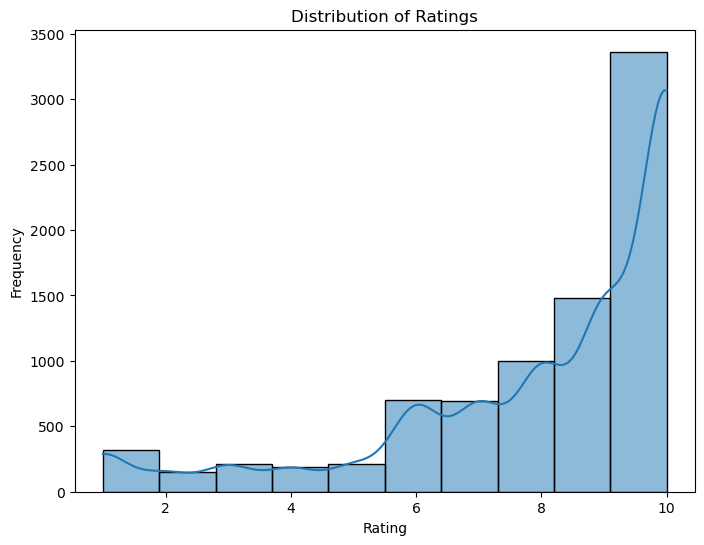

In [126]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating (out of 10)'], kde=True, bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3016\793501024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating (out of 10)', data=df, palette='viridis')


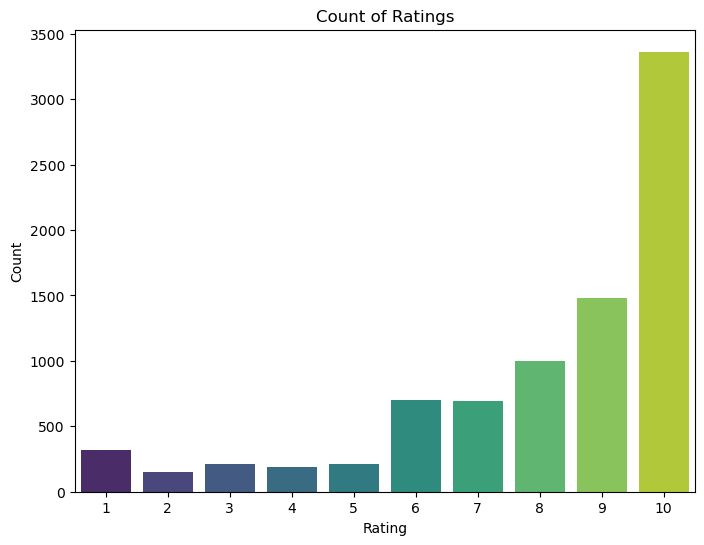

In [127]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating (out of 10)', data=df, palette='viridis')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [128]:
if 'Unnamed:0' in df.columns:
    df.drop(columns=['Unnamed:0'], inplace=True)

In [129]:
df.dropna(subset=['Review'], inplace=True)

In [130]:
port_stem=PorterStemmer()

In [131]:
def stemming(content):
  stemmed_con=re.sub('[^a-zA-Z]',' ',content)
  stemmed_con=stemmed_con.lower()
  stemmed_con=stemmed_con.split()
  stemmed_con=[port_stem.stem(word) for word in stemmed_con if not word in stopwords.words('english')]
  stemmed_con=' '.join(stemmed_con)
  return stemmed_con

In [132]:
df['stemmed_con']=df['Review'].apply(stemming)

In [133]:
df.head()

,Unnamed: 0,Rating (out of 10),Review,Show ID,Review ID,stemmed_con
0,0,9,Andor was every bit as good as I was hoping fo...,tt9253284,rw10514299,andor everi bit good hope might best star war ...
1,1,10,Wow. I just finished episode 12 of the first s...,tt9253284,rw8690571,wow finish episod first season show lifelong s...
2,2,10,Andor Season 2 is the best Star Wars Show ever...,tt9253284,rw10514285,andor season best star war show ever made real...
3,3,9,There were a few episodes I didn't like in bot...,tt9253284,rw10514788,episod like season finish season say show trul...
4,4,9,Didnt like the new movies and even Mandalorian...,tt9253284,rw8665236,didnt like new movi even mandalorian somehow b...


In [134]:
x=df['Review']
y=df['Rating (out of 10)']

In [135]:
x_train, x_test , y_train, y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [136]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
x_tfidf=vectorizer.fit_transform(x_train)
x_test_tfidf=vectorizer.transform(x_test)

In [154]:
texts = [
    "I don't know how to start. OK. It's not the same as things at the game but...",
    "Amazing show! Pedro Pascal is perfect."
]
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')
def simplify_rating(rating):
    if rating <= 4:
        return 'Negative'
    elif rating <= 7:
        return 'Neutral'
    else:
        return 'Positive'
df['Sentiment'] = df['Rating (out of 10)'].apply(simplify_rating)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
X = df['Review']  
y = df['Sentiment']
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.9)
X_vec = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [155]:
y_pred = model.predict(X_test)

In [156]:
accuracy = accuracy_score(y_test, y_pred)
print('Prediction Accuracy on Test Set:', accuracy)

Prediction Accuracy on Test Set: 0.6394230769230769


In [157]:
from sklearn.metrics import classification_report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.24      0.14      0.18       174
     Neutral       0.26      0.18      0.21       322
    Positive       0.73      0.84      0.78      1168

    accuracy                           0.64      1664
   macro avg       0.41      0.39      0.39      1664
weighted avg       0.59      0.64      0.61      1664



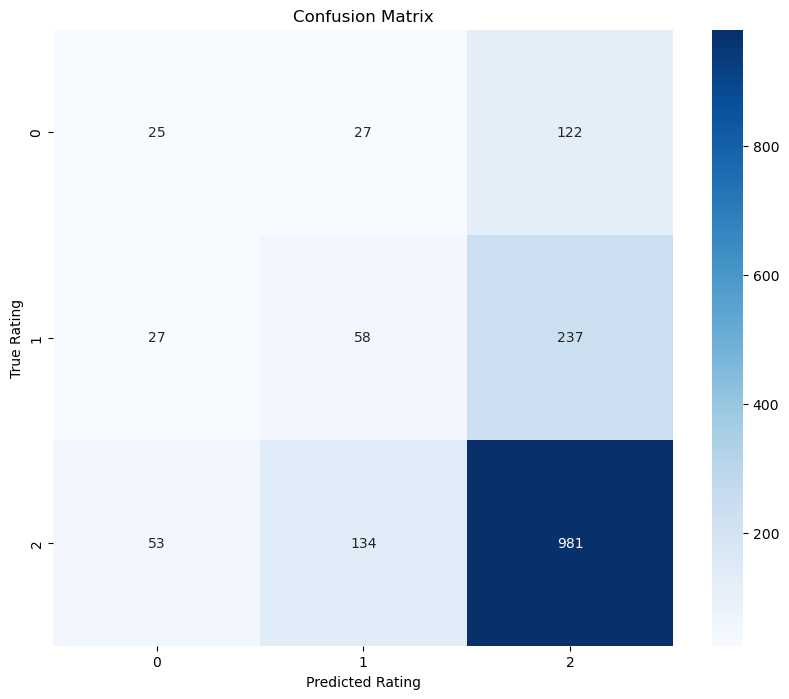

In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Rating')
plt.ylabel('True Rating')
plt.show()